# Test Script for automating AMI 340

In [13]:
import socket

The IP address changes after restart if the IP assignment is DHCP. 

In [2]:
ip_dict = {"x": '169.254.166.230', 
           "y": '169.254.152.233',  
           "z": '169.254.42.211'}

PORT = 7180; 
s = socket.socket (socket.AF_INET, socket.SOCK_STREAM)
s.connect((ip_dict["z"], PORT))
print(s.recv(2000).decode())
#s.close()

American Magnetics Model 430 IP Interface
Hello.



In [3]:
magnet_state = [
    '0 Return Value Meaning',
    '1 RAMPING to target field/current',
    '2 HOLDING at the target field/current',
    '3 PAUSED',
    '4 Ramping in MANUAL UP mode',
    '5 Ramping in MANUAL DOWN mode',
    '6 ZEROING CURRENT (in progress)',
    '7 Quench detected',
    '8 At ZERO current',
    '9 Heating persistent switch',
    '10 Cooling persistent switch',
    '11 External Rampdown active',
]

## Get Field Unit and Get Field

In [ ]:
def get_field_unit(handler):
    handler.sendall("FIELD:UNITS?\n".encode())
    reply = handler.recv(2000).decode()
    reply = int(reply.strip())
    return ['kiogauss', 'tesla'][reply]

def get_field(handler):
    handler.sendall("FIELD:Magnet?\n".encode())
    reply = handler.recv(2000).decode()
    return float(reply.strip())

get_field(s), get_field_unit(s)

## Set Target Field, Set Ramp Rate, Get Target Field, Get Target Rate

Double check the unit as the setting on the front panel is in A while the unit in the commands below uses kG. 

In [ ]:
def set_target_field(handler, kilogauss):
    message = "CONFigure:FIELD:TARGet:{kilogauss:.5f}\n"
    message = message.format(kilogauss = kilogauss)
    print(message)
    handler.sendall(message.encode())

set_target_field(s, 0)



s.sendall("RAMP:RATE:CURRENT:1?\n".encode())
print(s.recv(2000).decode())

s.sendall("FIELD:TARGet?\n".encode())
print(s.recv(2000).decode())

## Ramp

In [ ]:
def ramp(handler):
    handler.sendall("RAMP\n".encode())
    print('ramping')

ramp(s)

0.0250000,56.2

-1.200000



## Ask the state of the magnet
And use `get_field(s)` to get the magnet field value

In [13]:
s.sendall("State?\n".encode())
print(magnet_state[int(s.recv(2000).decode())])

1 RAMPING to target field/current


# Scratch 

In [ ]:
def set_magnet(axis, target, rate):
    s = socket.socket (socket.AF_INET, socket.SOCK_STREAM)
    
    ip_dict = {"x": '169.254.166.230', "y": '169.254.152.233',  "z": '169.254.81.105'}
    PORT = 7180; 
    s.connect((ip_dict[axis], PORT))
    print(s.recv(2000).decode())
    
    s.sendall("CONFigure:FIELD:TARGet:0.98\n".encode())
    s.close()
    
def get_magnet(axis):
    s = socket.socket (socket.AF_INET, socket.SOCK_STREAM)
    
    ip_dict = {"x": '169.254.166.230', "y": '169.254.152.233',  "z": '169.254.81.105'}
    PORT = 7180; 
    s.connect((ip_dict[axis], PORT))
    print("\n-----Communicating with " + axis + " axis-----")
    print(s.recv(2000).decode())

    
    def wrapper(argumnent):
        argumnent = argumnent + '\n'
        s.sendall(argumnent.encode())
        return s.recv(2000).decode().strip()
    
    print("Segments in ramp rate: " + wrapper("RAMP:RATE:SEGments?"))
    print("Current minimum: " + wrapper("SUPPly:CURRent:MINimum?"))
    print("Target Field: " + wrapper("FIELD:TARGet?"))
    print("Target Rate: " + wrapper("RAMP:RATE:CURRENT:1?"))
    print("Field: " + wrapper("FIELD:MAGnet?"))
    print("State: " + magnet_state[int(wrapper("STATE?"))])
    print("Serial: " + wrapper("PRINT:SERIALnumber?"))
    s.close()
    
#get_magnet("x")
#get_magnet("y")
get_magnet("z")

In [ ]:
set_magnet("x", 0, 0)
set_magnet("y", 0, 0)
set_magnet("z", 0, 0)

In [ ]:
s.sendall("*IDN?\n".encode())
print(s.recv(2000).decode())



In [ ]:
s.sendall("SUPPly:VOLTage:MINimum?\n".encode())
print(s.recv(2000).decode())

s.sendall("SUPPly:VOLTage:MAXimum?\n".encode())
print(s.recv(2000).decode())

s.sendall("SUPPly:CURRent:MINimum?\n".encode())
print(s.recv(2000).decode())

s.sendall("SUPPly:CURRent:MINimum?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("SYSTem:TIME?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("SYSTem:TIME:SET <date(12/06/2019) time(11:50:00)>\n".encode())


In [ ]:
s.sendall("SYSTem:TIME?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("CURRent:LIMit?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("*LED?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("*STB?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("SUPPly:TYPE?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("SUPPly:MODE?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("STABility:MODE?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("CONFigure:STABility:MODE 1\n".encode())

In [ ]:
print(s.recv(2000).decode())

In [ ]:
s.sendall("STABility?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("CONFigure:STABility 91\n".encode())


In [ ]:
s.sendall("STABility?\n".encode())
print(s.recv(2000).decode())

In [ ]:
s.sendall("COILconst?\n".encode())
print(s.recv(2000).decode())

<IPython.core.display.Javascript object>


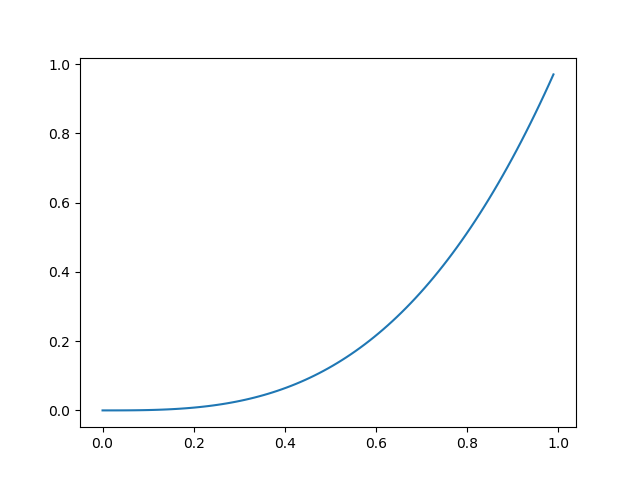

In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

x_array = np.linspace(0, 1, 100)
y_array = x_array**3

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(x_array[:i], y_array[:i])
    fig.canvas.draw()